In [1]:
# Import all library.

import ROOT
import numpy as np
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

In [3]:
output = "~/MyWorkspace/DATA"

In [2]:
from sklearn.externals import joblib
#Use ROOT in order to create a numpy array with selected variables

#processes = "lvbb125,TTbar,Wbb,Wbl,Wll,Wcl,Wcc,WW,WZ,ZZ"
processes = "TTbar"
output = "~/MyWorkspace/DATA"

data_path = "~/MyWorkspace/DATA"

for process in processes.split(","):
    data_input = data_path+"/"+process+".root"
    treeName = "perevent"
    file = ROOT.TFile(data_input,"READ")
    tree = file.Get(treeName)
    nrEvents = tree.GetEntries()

    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
    
        #=============================================================================
        #=======================EMJESGSCMu========================================
        # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
        # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
        # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)
    
        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
        # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
        #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
        #==========================
        #========Target===========
    
    
        j1_FracEM3 = tree.j1_FracEM3
        j1_FracTile0 = tree.j1_FracTile0
        j1_TrkWidth = tree.j1_TrkWidth
        j1_EMF = tree.j1_EMF
        j1_JVF = tree.j1_JVF
        j1_NTrk = tree.j1_NTrk 
        j1_SumPtTrk = tree.j1_SumPtTrk
        # only for EM and j2.
        j2_FracEM3 = tree.j2_FracEM3
        j2_FracTile0 = tree.j2_FracTile0
        j2_TrkWidth = tree.j2_TrkWidth
        j2_EMF = tree.j2_EMF
        j2_JVF = tree.j2_JVF
        j2_NTrk = tree.j2_NTrk 
        j2_SumPtTrk = tree.j2_SumPtTrk
    
    
        # Create a numpy array with all data
        dataBuffer = np.array([[j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk, j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu,j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk, j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu, E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu]])
        if i==0:
            data = dataBuffer
        else:
            data = np.append(data,dataBuffer, axis=0)
    np.save(output+"/"+process+"Matrix",data)
    #joblib.dump(data,output+"/"+process+"Array")

data

AttributeError: 'TObject' object has no attribute 'GetEntries'

In [5]:
# Confirm our array shape
signal = np.load("/home/micael/MyWorkspace/DATA/lvbb125Array.npy")
signal = np.delete(signal,11,axis=1)

signal.shape

(191100, 13)

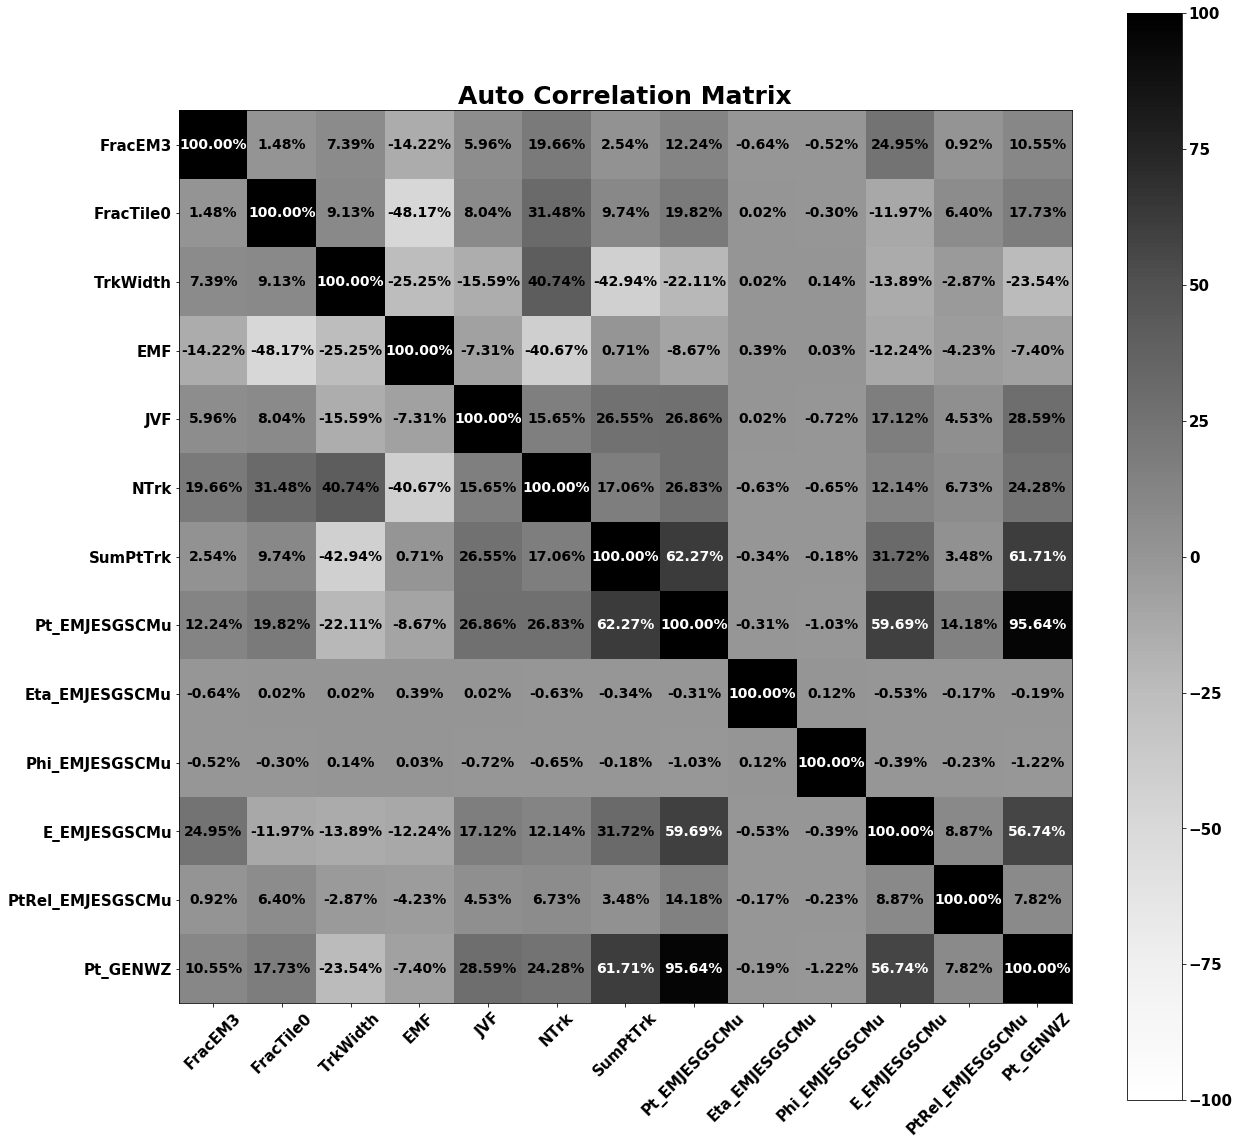

In [10]:
# plot the variables auto correlaction matrix 

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rc('legend', **{'fontsize':15})

plt.rc('font', weight='bold', size=14)

AutCor = 100.0*np.corrcoef(signal, rowvar=0)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.set_aspect(1)

#fig, ax = plt.subplots()
AutoCor_Matrix = ax.imshow(AutCor,interpolation='nearest',cmap=plt.cm.Greys,clim=(-100.0, 100.0))
#heatmap = ax.pcolor(T,cmap=plt.cm.Blues,alpha=0.9)
# Format
#fig = plt.gcf()
#fig.set_size_inches(20, 20)

width, height = AutCor.shape

for x in xrange(width):
    for y in xrange(height):
        if AutCor[x][y] < 50.:
            ax.annotate("%1.2f%%"%(AutCor[x][y]), xy=(y, x), horizontalalignment="center",verticalalignment="center")
        else:
            ax.annotate("%1.2f%%"%(AutCor[x][y]), xy=(y, x), horizontalalignment="center",verticalalignment="center",color="white")

# turn off the frame
#ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(AutCor.shape[1]))
ax.set_xticks(np.arange(AutCor.shape[0]))

labels = ['FracEM3', 'FracTile0', 'TrkWidth', 'EMF', 'JVF', 'NTrk', 'SumPtTrk', 'Pt_EMJESGSCMu', 'Eta_EMJESGSCMu', 'Phi_EMJESGSCMu', 'E_EMJESGSCMu', 'PtRel_EMJESGSCMu', 'Pt_GENWZ']

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.xticks(rotation=45)

ax.set_title('Auto Correlation Matrix', fontweight='bold', fontsize=25)

fig.colorbar(AutoCor_Matrix)